# Table of Contents:
1. [Library Imports](#li)
2. [Data Preparation](#dp)
3. [Method Comparison](#mc)
4. [K-Means](#km)
5. [Hierarchical](#h)
6. [DBSCAN](#d)
7. [UMAP](#u)

# 1. Library Imports
<a id='li'></a>

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from utils2 import *
import umap

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Data Preparation
<a id='dp'></a>

#### Import the data

In [26]:
data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2uni_wzipid_no0_out_perc.csv')
# data = pd.read_csv('Data\\New_Data\\project_data_cleaned_noreturnincons_impute2uni_wzipid_no0_out99_perc.csv')

#### Define metrics to study

In [27]:
demographic_metrics = ['frequency_items', 'potencial_score', 'zip_code', 'longevity_months', 'credit_factor', 'relevance_criteria', 'recency_in_weeks', 'returns', 'flaged', 'promotional_percentage']

In [28]:
demographic = data[demographic_metrics]

#### Encode categorical variables

In [29]:
def get_ohc_df(df, feats):
  # Use OneHotEncoder to encode the categorical features.
  # Get feature names and create a DataFrame
  # with the one-hot encoded categorical features (pass feature names)

  ohc = OneHotEncoder(sparse_output=False, drop="first")
  ohc_feat = ohc.fit_transform(df[feats])
  ohc_feat_names = ohc.get_feature_names_out()
  ohc_df = pd.DataFrame(ohc_feat, index=df.index, columns=ohc_feat_names)

  # Reassigning df to contain ohc variables
  df_ohc = pd.concat([df, ohc_df], axis=1)

  return df_ohc, ohc

demographic, ohc = get_ohc_df(demographic, ['relevance_criteria'])

demographic

,frequency_items,potencial_score,zip_code,longevity_months,credit_factor,relevance_criteria,recency_in_weeks,returns,flaged,promotional_percentage,relevance_criteria_Priority,relevance_criteria_Unknown
0,38,-0.40,0,23,0.7,Priority,15,0,0,20,1.0,0.0
1,50,-0.30,0,24,0.7,Priority,10,0,0,36,1.0,0.0
2,48,1.60,0,32,0.7,Priority,20,0,0,0,1.0,0.0
3,46,-0.90,0,12,1.0,Priority,14,0,0,36,1.0,0.0
4,31,31.61,8,10,0.7,Priority,12,0,0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122741,51,0.10,0,25,0.7,Priority,9,6,0,0,1.0,0.0
122742,42,30.99,8,23,0.7,Priority,15,0,0,0,1.0,0.0
122743,24,79.76,8,29,0.7,Priority,13,0,0,13,1.0,0.0
122744,29,0.50,0,14,0.7,Priority,11,0,0,0,1.0,0.0


In [30]:
demographic.drop(columns=['relevance_criteria'], inplace=True)

In [31]:
demographic_metrics = ['frequency_items', 'potencial_score', 'zip_code', 'longevity_months', 'credit_factor', 'relevance_criteria_Priority', 'relevance_criteria_Unknown', 'recency_in_weeks', 'returns', 'flaged', 'promotional_percentage']

#### Scale the data

In [32]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [33]:
dem_no_scl = demographic.copy()
dem_st_scl = standard.fit_transform(demographic)
dem_mm_scl = minmax.fit_transform(demographic)
dem_rb_scl = robust.fit_transform(demographic)

In [34]:
demographic_no_scl = demographic.copy()
demographic_no_scl[demographic_metrics] = dem_no_scl

demographic_st_scl = demographic.copy()
demographic_st_scl[demographic_metrics] = dem_st_scl

demographic_mm_scl = demographic.copy()
demographic_mm_scl[demographic_metrics] = dem_mm_scl

demographic_rb_scl = demographic.copy()
demographic_rb_scl[demographic_metrics] = dem_rb_scl

# Clustering Method Comparison
<a id='mc'></a>

In [35]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)

hierarchical = AgglomerativeClustering(metric='euclidean')

In [36]:
sample_original = demographic.sample(frac=0.2, random_state=1)
sample_no_scl = demographic_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = demographic_mm_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = demographic_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = demographic_rb_scl.sample(frac=0.2, random_state=1)

### No Scale

In [37]:
dem_no_r2_scores = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores

,kmeans,complete,average,single,ward
2,0.365404,0.117375,0.021414,0.021414,0.339663
3,0.569686,0.225064,0.210005,0.045949,0.536937
4,0.648104,0.227340,0.227958,0.046207,0.619829
5,0.704428,0.230653,0.230868,0.046249,0.695457
6,0.739749,0.285928,0.272901,0.046319,0.723456
7,0.760847,0.287438,0.273649,0.050173,0.741572
8,0.778689,0.300038,0.323846,0.051711,0.759299
9,0.796300,0.638977,0.325004,0.054106,0.774023


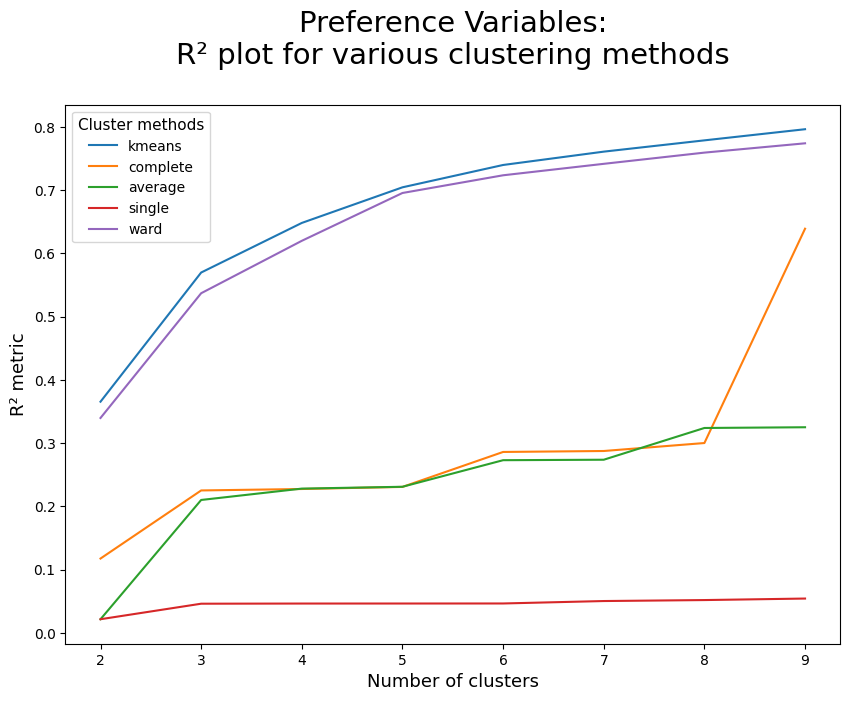

In [38]:
plot_r2_scores(dem_no_r2_scores)